# Data Analytics II
1. Implement logistic regression using Python/R to perform classification on
Social_Network_Ads.csv dataset.
2. Compute Confusion matrix to find TP, FP, TN, FN, Accuracy, Error rate, Precision,
Recall on the given dataset.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing

sns.set_theme(style="whitegrid",font_scale = 1.5)

## Dataset used: 
    Social_Network_Ads.csv 
    
### Data description:
The Dataset used in these models tells about whether a person of certain age having certain income purchases a product or not.
We need to predict whether a targeted audience will purchase the product or not.

In [2]:
rdata=pd.read_csv('./datasets/Social_Network_Ads.csv')
rdata.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
rdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [4]:
rdata.isnull().isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [5]:
rdata.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


## Data Visualization

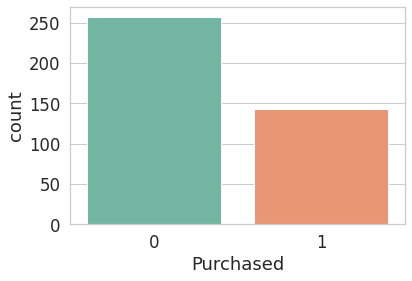

In [6]:
sns.countplot(data=rdata,x='Purchased',palette='Set2')
plt.show()

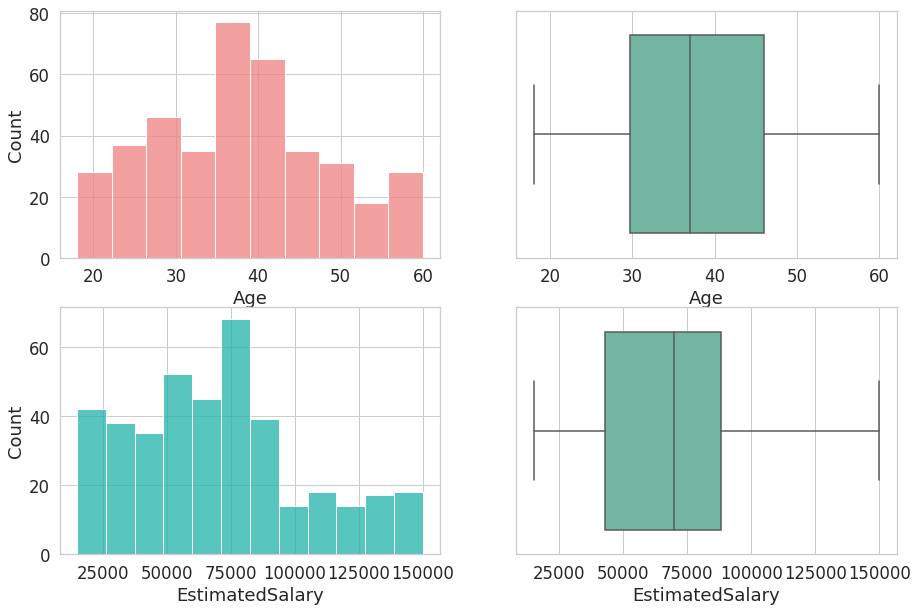

In [7]:
fig, axs = plt.subplots(2, 2)
fig.set_figheight(10)
fig.set_figwidth(15)
sns.histplot(data=rdata,x='Age',color='lightcoral',ax=axs[0, 0])
sns.boxplot(data=rdata,x='Age',ax=axs[0, 1],palette='Set2')
sns.histplot(data=rdata,x='EstimatedSalary',color='lightseagreen',ax=axs[1, 0])
sns.boxplot(data=rdata,x='EstimatedSalary',ax=axs[1, 1],palette='Set2')
plt.show()

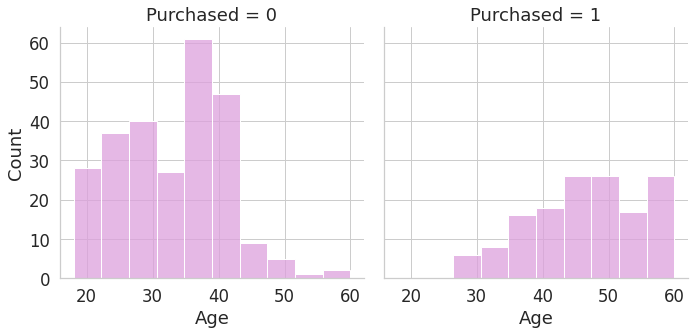

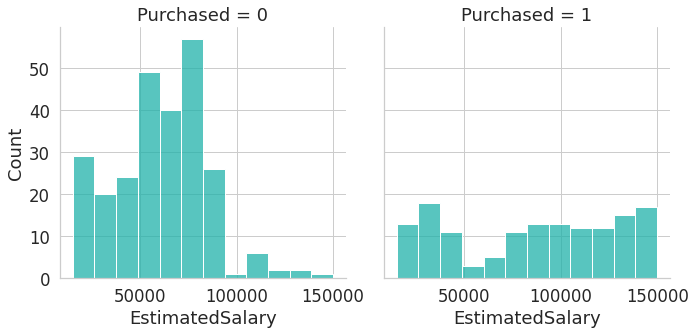

In [8]:
sns.displot(data=rdata,x='Age',col='Purchased',color='plum')
plt.show()
sns.displot(data=rdata,x='EstimatedSalary',col='Purchased',color='lightseagreen')
plt.show()

In [126]:
import scipy.stats as st
def normality_test(data):
    print('Skewness : ',data.skew())
    print('Kurtosis : ',data.kurt())
    plt.figure(figsize=(10,5))
    plt.subplot(1, 2, 1)
    sns.kdeplot(data,color='b')
    plt.title('KDE plot')
    plt.xlabel('Scores')
    plt.ylabel('Probability Density')
    plt.subplot(1, 2, 2) 
    st.probplot(data,plot=plt,fit=True)
    plt.show()

## Data Preprocessing

In [9]:
data=rdata.copy(deep=True)
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [71]:
scaler = preprocessing.StandardScaler()
scaled = scaler.fit_transform(data[['Age','EstimatedSalary']])
scaled=pd.DataFrame(scaled,columns=['Age','EstimatedSalary'])
scaled.head()

,Age,EstimatedSalary
0,-1.781797,-1.490046
1,-0.253587,-1.460681
2,-1.113206,-0.785290
3,-1.017692,-0.374182
4,-1.781797,0.183751


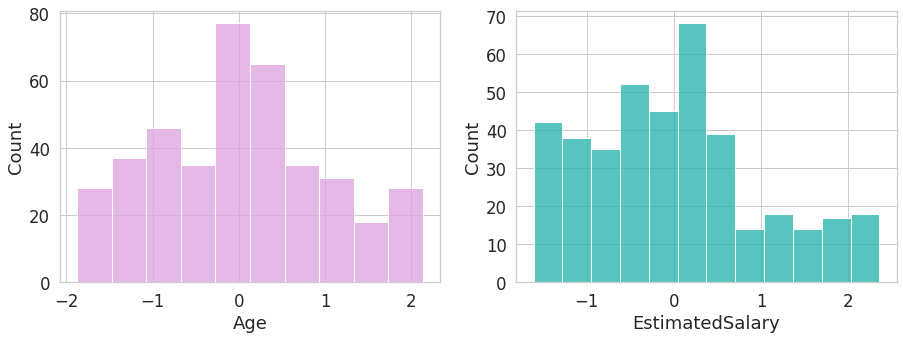

In [72]:
fig, axs = plt.subplots(1, 2)
fig.set_figheight(5)
fig.set_figwidth(15)
sns.histplot(data=scaled,x='Age',color='plum',ax=axs[0])
sns.histplot(data=scaled,x='EstimatedSalary',color='lightseagreen',ax=axs[1])
plt.show()
 

In [73]:
X=pd.get_dummies(data[['Gender']])
X['Age']=scaled.Age
X['EstimatedSalary']=scaled.EstimatedSalary
X.head()

,Gender_Female,Gender_Male,Age,EstimatedSalary
0,0,1,-1.781797,-1.490046
1,0,1,-0.253587,-1.460681
2,1,0,-1.113206,-0.785290
3,1,0,-1.017692,-0.374182
4,0,1,-1.781797,0.183751


In [74]:
Y=data.Purchased

## Logistic Regression

In [85]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score

In [121]:
def train_model(model,x_train,y_train,x_test,y_test):
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    
    conf_matrix=confusion_matrix(y_test, y_pred)
    TP=conf_matrix[1][1]
    TN=conf_matrix[0][0]
    FP=conf_matrix[0][1]
    FN=conf_matrix[1][0]
    
    error_rate=(FP+FN)/(TP+FP+TN+FN)
    acc=(TP+TN)/(TP+FP+TN+FN)
    prec=TP/(TP+FP)
    rec=TP/(TP+FN)
    '''print('Accuracy = %.3f'%(accuracy_score(y_test, y_pred)))
    print('Precision = %.3f'%(precision_score(y_test, y_pred)))
    print('Recall = %.3f'%(recall_score(y_test, y_pred)))'''
    
    print('Classification Metrics :\n')
    print('Accuracy = %.3f'%(acc))
    print('Precision = %.3f'%(prec))
    print('Recall = %.3f'%(rec))
    print('Error Rate = %.3f'%(error_rate))
    print('\n')
    plt.figure(figsize=(8,5))
    p=sns.heatmap(conf_matrix,annot=True,cmap='Blues')
    plt.title('Confusion Matrix')
    plt.ylabel('Actual Values')
    plt.xlabel('Predicted Values')
    plt.show()
    return conf_matrix

In [122]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,random_state=0,test_size=0.3)


Classification Metrics :

Accuracy = 0.892
Precision = 0.868
Recall = 0.805
Error Rate = 0.108




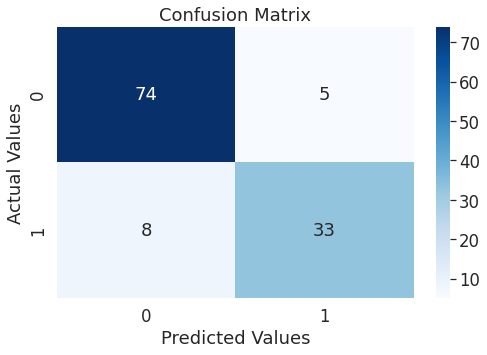

In [123]:
model=LogisticRegression()
c=train_model(model,x_train,y_train,x_test,y_test)

Skewness :  0.23133746309642822
Kurtosis :  -0.6225130156590515


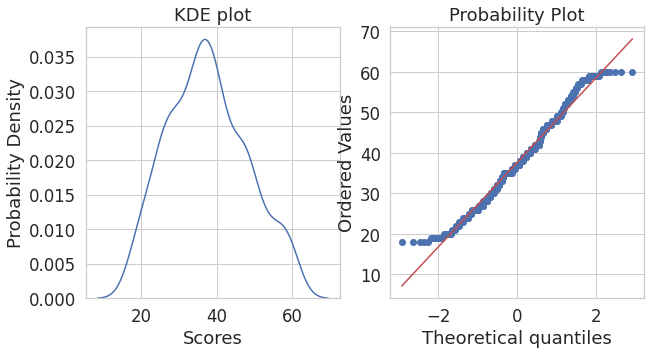

Skewness :  -0.0540372961573467
Kurtosis :  -0.6450087431607008


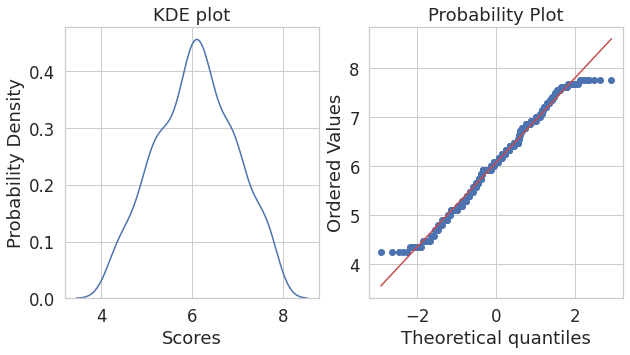

Skewness :  0.49502362888993623
Kurtosis :  -0.4058775625580293


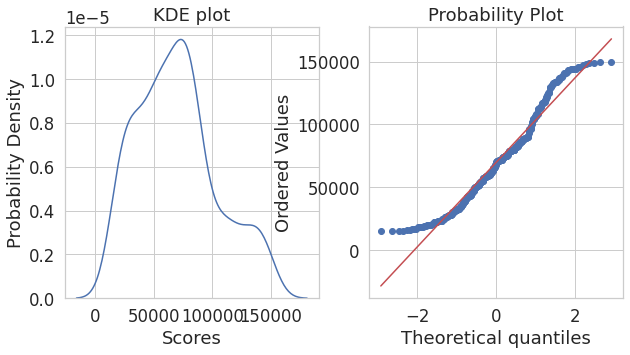

Skewness :  -0.019374391028588567
Kurtosis :  -0.6554861544107791


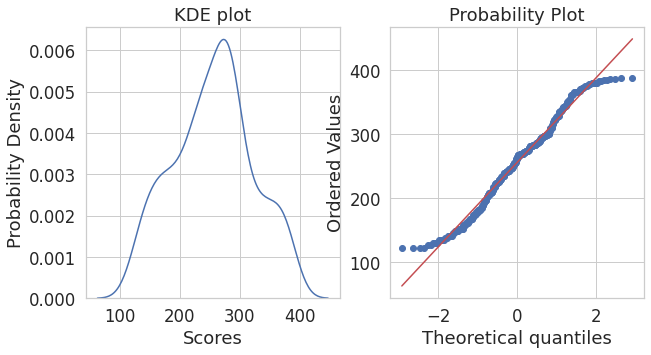

In [135]:
normality_test(rdata.Age)
normality_test(np.sqrt(rdata.Age))
normality_test(rdata['EstimatedSalary'])
normality_test(np.sqrt(rdata['EstimatedSalary']))

In [140]:
data.Age=np.log(data.Age)
data.EstimatedSalary=np.log(data.EstimatedSalary)
scaler = preprocessing.StandardScaler()
scaled = scaler.fit_transform(data[['Age','EstimatedSalary']])
scaled=pd.DataFrame(scaled,columns=['Age','EstimatedSalary'])
scaled.head()

,Age,EstimatedSalary
0,-2.213796,-2.095414
1,-0.111659,-2.002996
2,-1.134501,-0.623805
3,-1.004637,-0.115976
4,-2.213796,0.402359


In [141]:
X=pd.get_dummies(data[['Gender']])
X['Age']=scaled.Age
X['EstimatedSalary']=scaled.EstimatedSalary
X.head()

,Gender_Female,Gender_Male,Age,EstimatedSalary
0,0,1,-2.213796,-2.095414
1,0,1,-0.111659,-2.002996
2,1,0,-1.134501,-0.623805
3,1,0,-1.004637,-0.115976
4,0,1,-2.213796,0.402359


Classification Metrics :

Accuracy = 0.867
Precision = 0.821
Recall = 0.780
Error Rate = 0.133




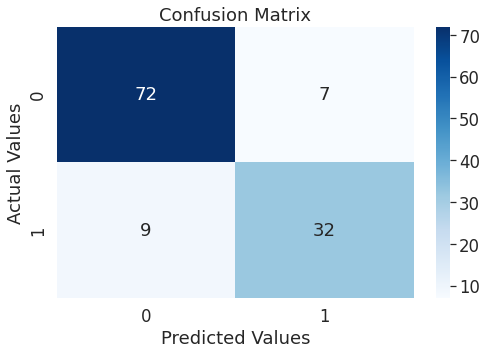

In [142]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,random_state=0,test_size=0.3)
model=LogisticRegression()
c=train_model(model,x_train,y_train,x_test,y_test)